In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import configparser

In [26]:
config = configparser.ConfigParser()
config.read('/Users/lfarias/Downloads/Kaggle-IFT3395/naive_bayes/config.ini')

train_file_path = config['Paths']['train_file']
test_file_path = config['Paths']['test_file']

train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

X_train = train.iloc[:, :-1]  # features in the training data
y_train = train.iloc[:, -1]    # labels in the training data

X_test = test.values    # features in the testing data (no labels)

In [27]:
class GaussianNaiveBayes:
        """
        A Gaussian Naive Bayes classifier implementation for continuous data.

        Attributes:
            None

        Methods:
            - fit(X, y): Fit the classifier to the training data.
            - predict(X): Predict the class labels for a set of input samples.

        """
        def fit(self, X, y):
            """
            Fit the Gaussian Naive Bayes classifier to the training data.

            Parameters:
                X (numpy.ndarray): Training data with shape (n_samples, n_features).
                y (numpy.ndarray): Target labels with shape (n_samples,).

            Returns:
                None

            """
            n_samples, n_features = X.shape
            self._classes = np.unique(y)
            n_classes = len(self._classes)
            self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
            self._var = np.zeros((n_classes, n_features), dtype=np.float64)
            self._priors = np.zeros(n_classes, dtype=np.float64)

            for i, c in enumerate(self._classes):
                X_for_class_c = X[y == c]
                self._mean[i, :] = X_for_class_c.mean(axis=0)
                self._var[i, :] = X_for_class_c.var(axis=0)
                self._priors[i] = X_for_class_c.shape[0] / float(n_samples)

        def _calculate_likelihood(self, class_idx, x):
            """
            Calculate the likelihood for a sample belonging to a class.

            Parameters:
                class_idx (int): Index of the target class.
                x (numpy.ndarray): Input sample.

            Returns:
                numpy.ndarray: Array of likelihood values.

            """
            mean = self._mean[class_idx]
            var = self._var[class_idx]
            num = np.exp(- (x - mean) ** 2 / (2 * var))
            denom = np.sqrt(2 * np.pi * var)
            return num / denom

        def predict(self, X):
            """
            Predict the class labels for a set of input samples.

            Parameters:
                X (numpy.ndarray): Input samples with shape (n_samples, n_features).

            Returns:
                numpy.ndarray: Predicted class labels for the input samples.

            """
            y_pred = [self._classify_sample(x) for x in X]
            return np.array(y_pred)

        def _classify_sample(self, x):
            """
            Classify a single input sample into one of the classes.

            Parameters:
                x (numpy.ndarray): Input sample.

            Returns:
                int: Predicted class label for the input sample.

            """
            posteriors = []
            for i, c in enumerate(self._classes):
                prior = np.log(self._priors[i])
                posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
                posterior = prior + posterior
                posteriors.append(posterior)

            return self._classes[np.argmax(posteriors)]

In [30]:
# Usage
gnb = GaussianNaiveBayes()
gnb.fit(X_train.values, y_train.values)
pred = gnb.predict(X_test)

In [32]:
res = pd.DataFrame({'SNo': test['SNo'], 'Label': pred})
res.to_csv('/Users/lfarias/Downloads/Kaggle-IFT3395/naive_bayes/Output/GNB.csv', index=False)

In [12]:
predicted_labels = gnb.predict(X_test)

In [13]:
results = pd.DataFrame({'SNo': test['SNo'], 'Label': predicted_labels})
results.to_csv('gnb.csv', index=False)

In [14]:
actual_labels = train['Label'].to_numpy()

In [15]:
def plot_confusion_matrix(actual, predicted):
    unique_classes = np.unique(np.concatenate((actual, predicted)))
    matrix = np.zeros((len(unique_classes), len(unique_classes),))
    for a, p in zip(actual, predicted):
        matrix[a][p] += 1

    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(unique_classes))
    plt.xticks(tick_marks, unique_classes)
    plt.yticks(tick_marks, unique_classes)

    for i in range(len(unique_classes)):
        for j in range(len(unique_classes)):
            plt.text(j, i, str(int(matrix[i, j])),
                horizontalalignment="center", color="white" if matrix[i, j] > matrix.max() / 2. else "black")

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


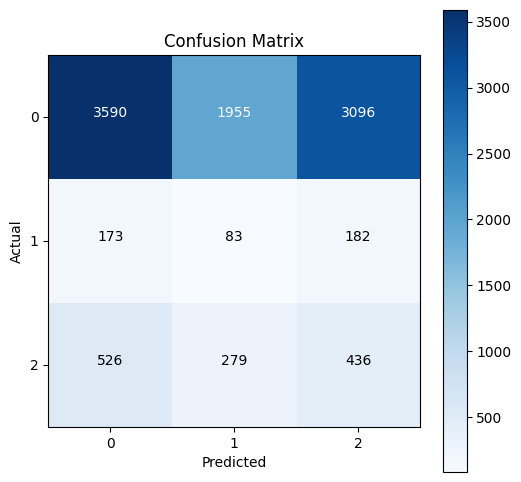

In [16]:
plot_confusion_matrix(actual_labels, predicted_labels)

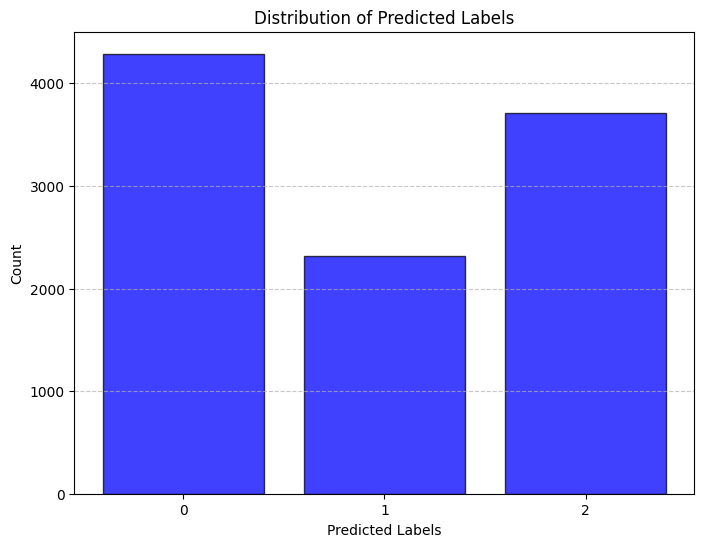

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(predicted_labels, bins=np.arange(4) - 0.5, rwidth=0.8, alpha=0.75, color='blue', edgecolor='black')
plt.xticks(range(3))
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

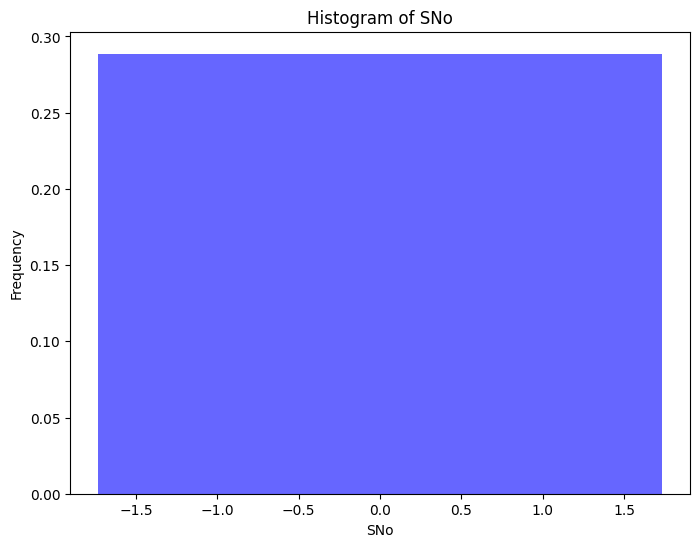

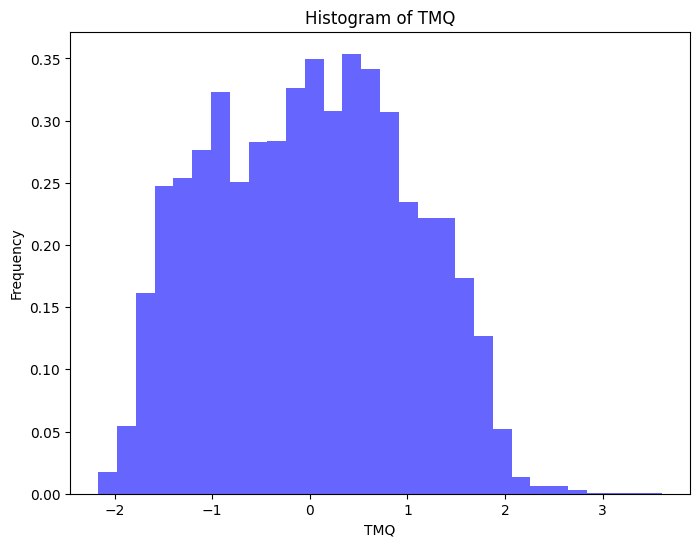

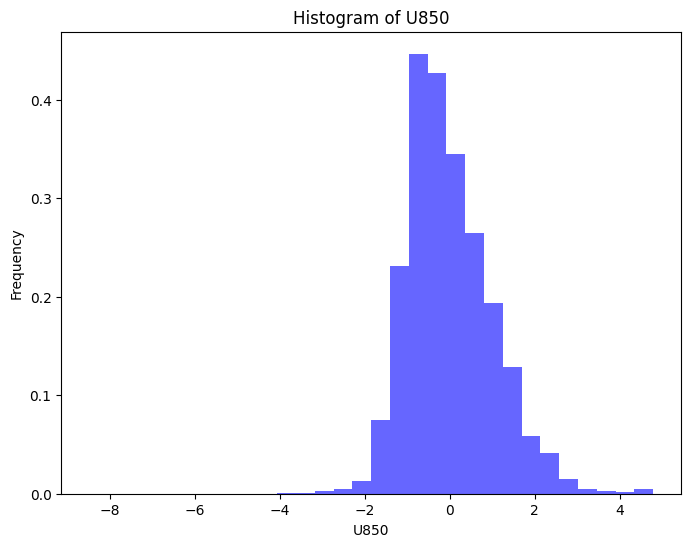

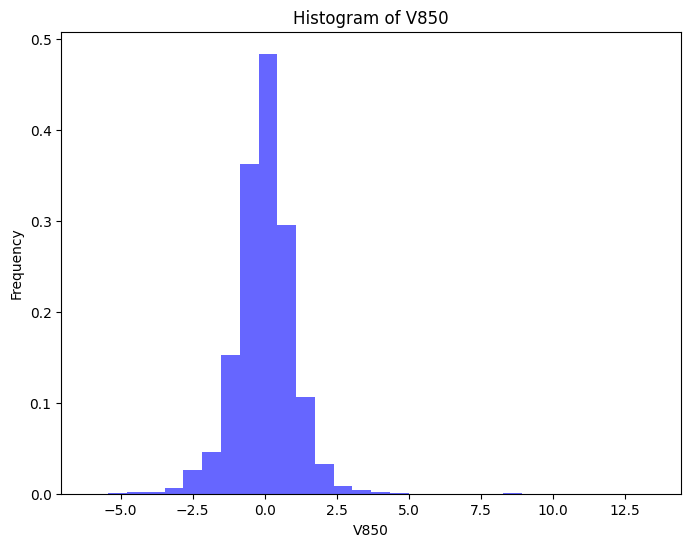

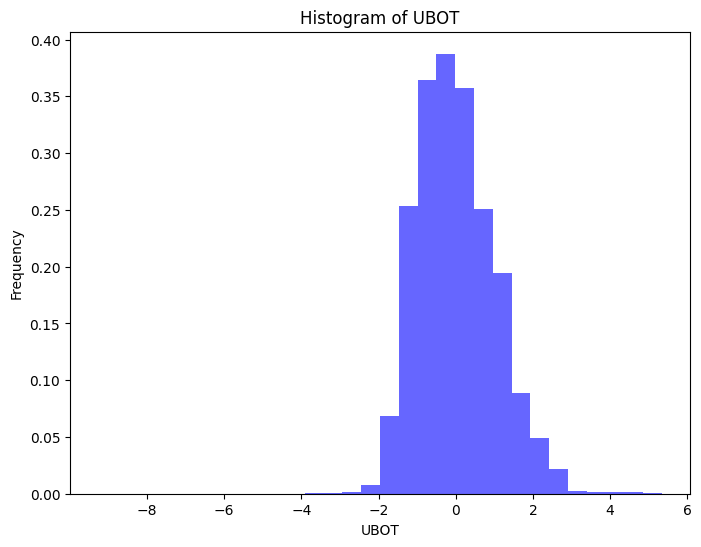

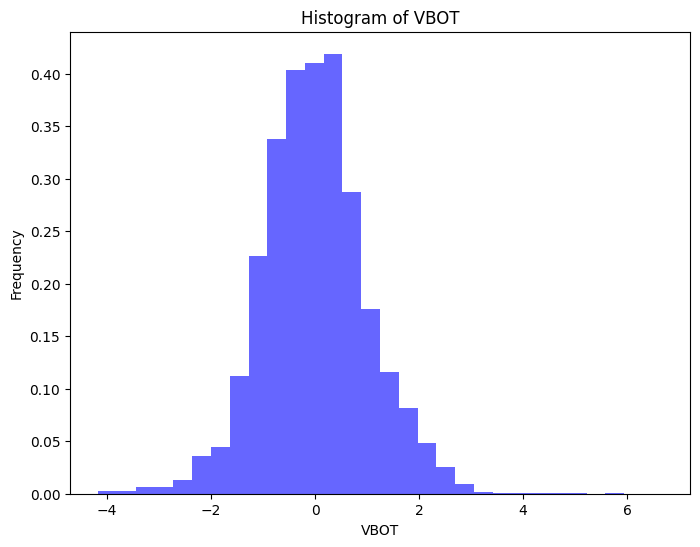

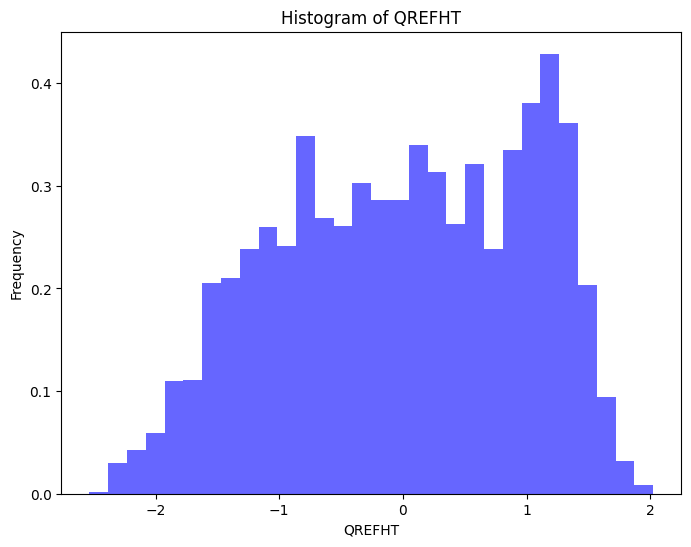

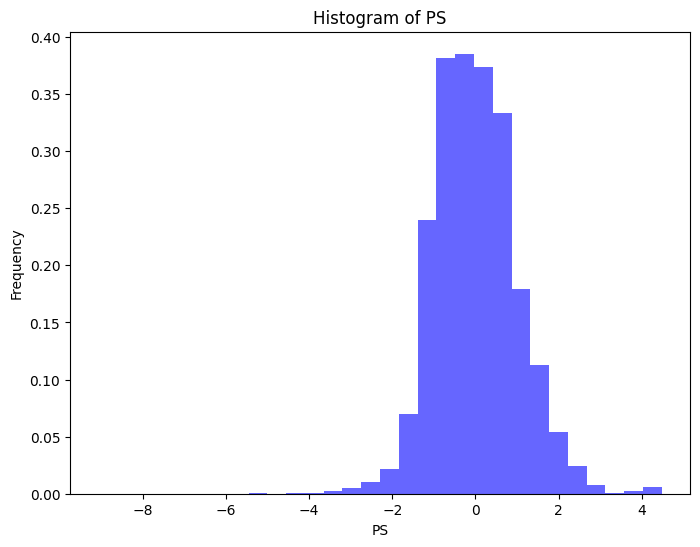

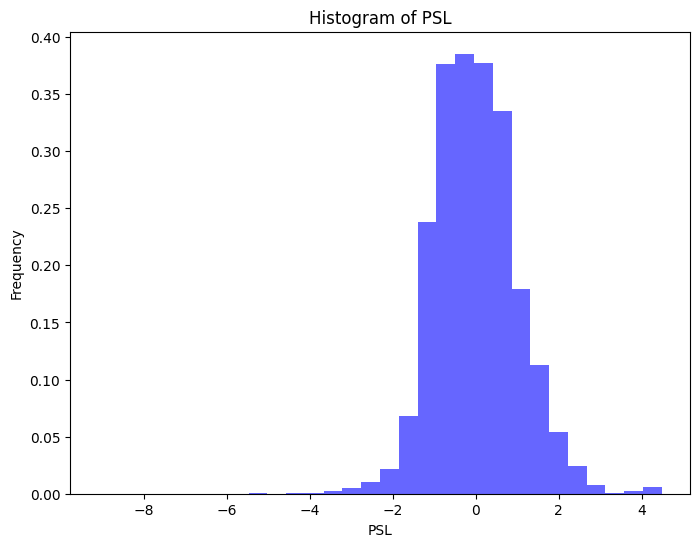

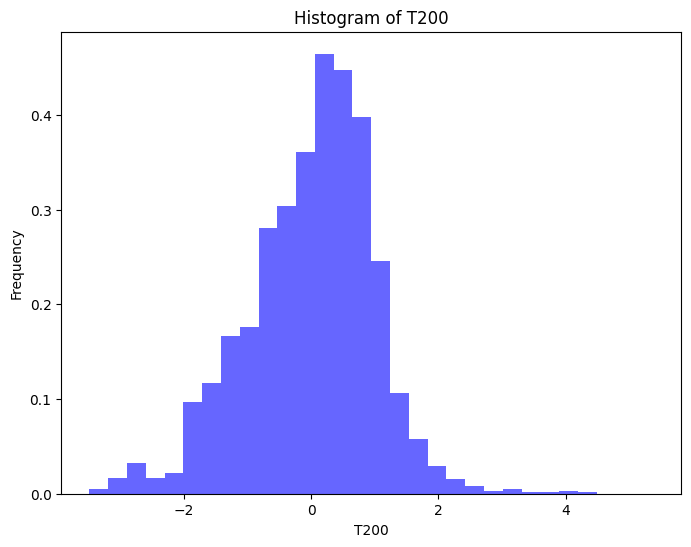

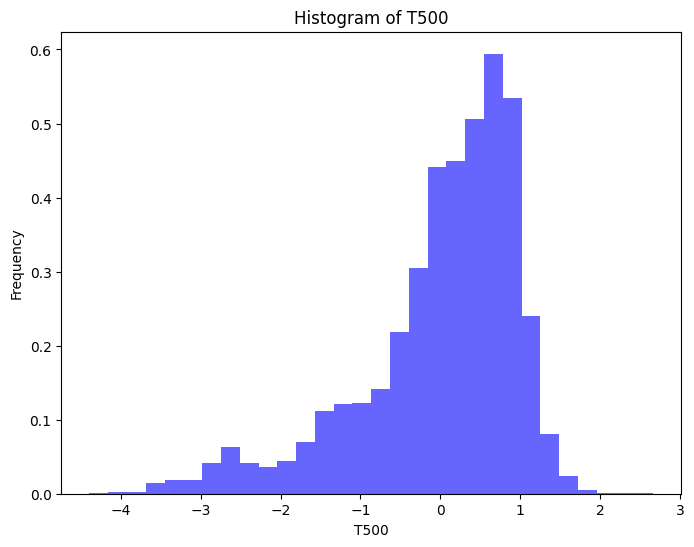

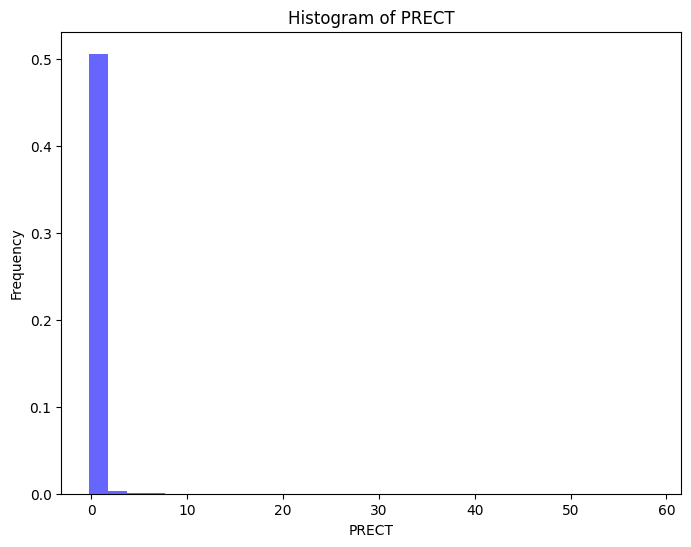

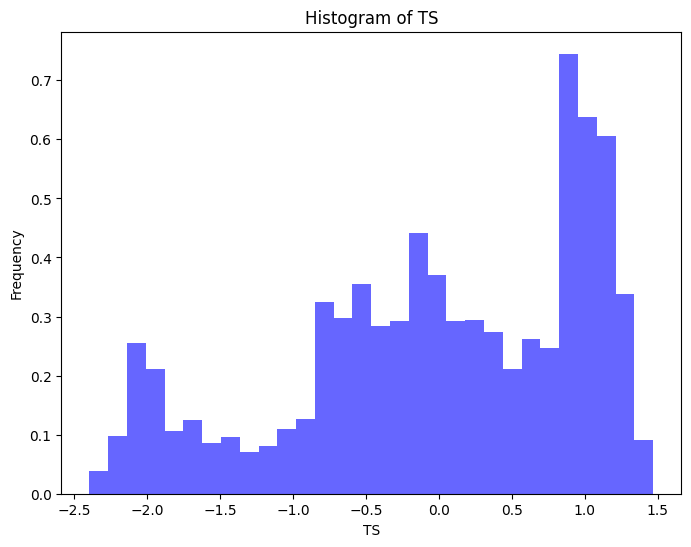

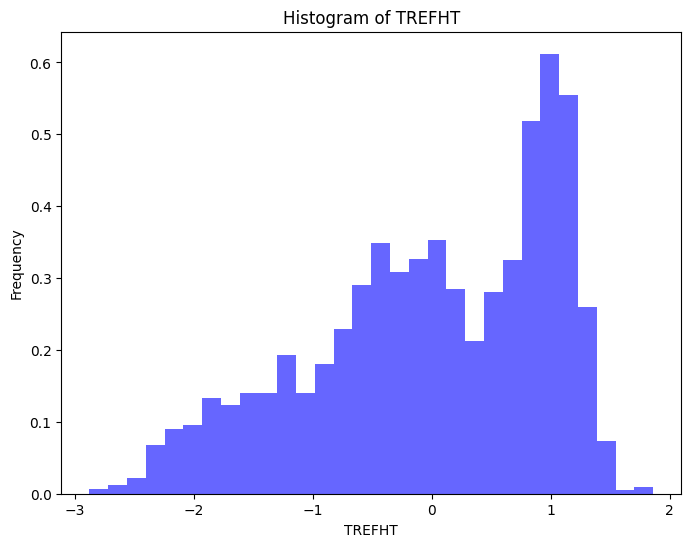

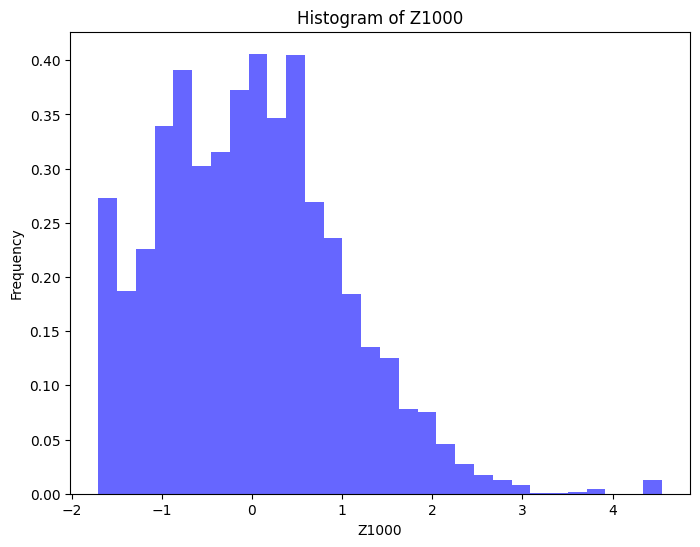

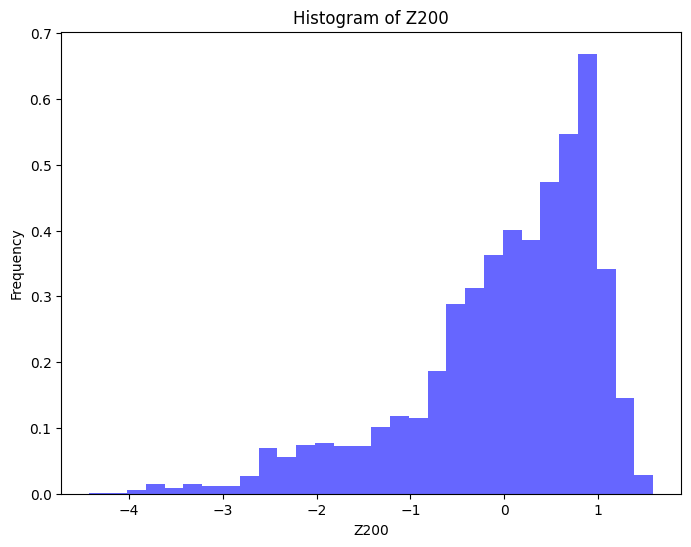

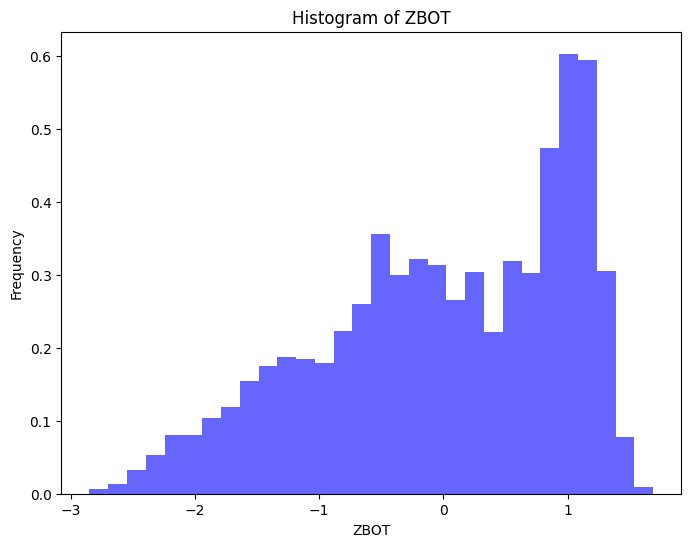

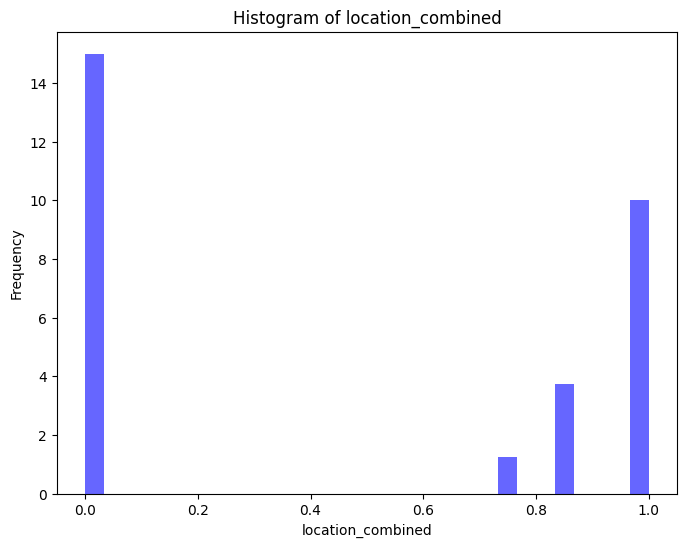

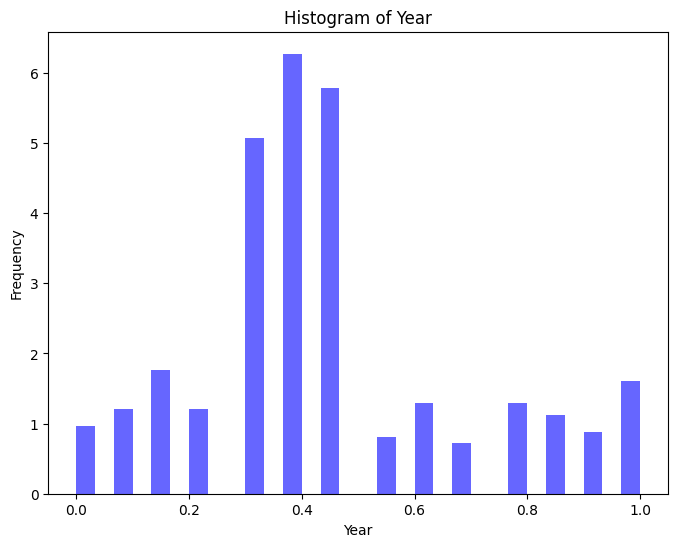

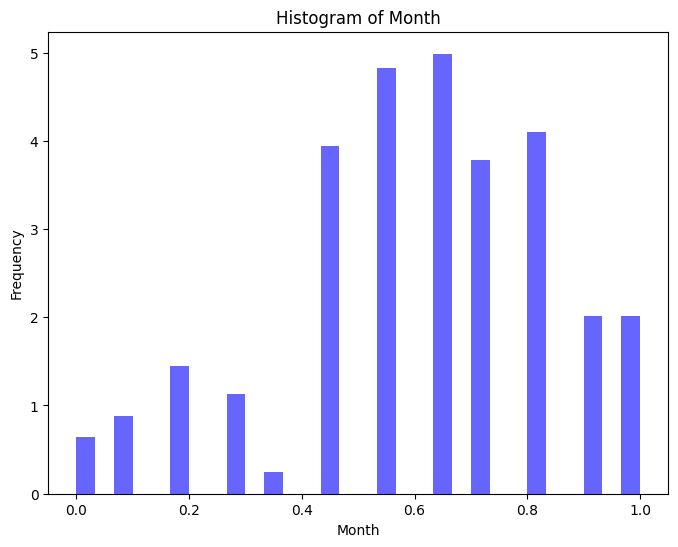

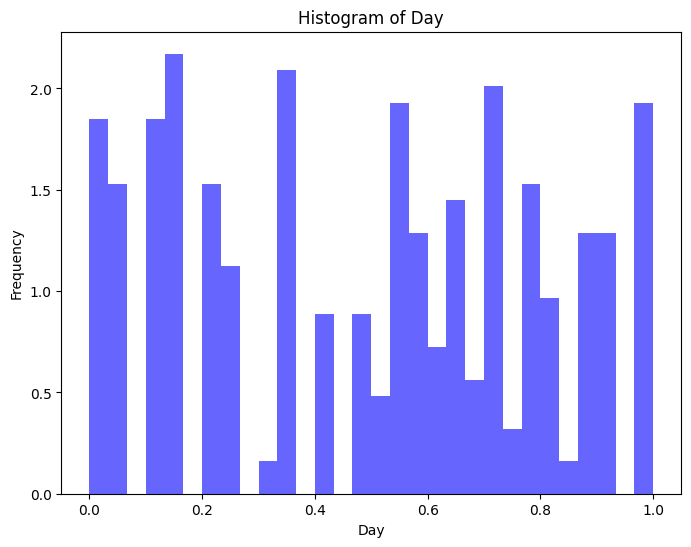

In [18]:
import scipy.stats as stats  # For Q-Q plot

# Assuming X_train is your feature matrix
for feature in X_train.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X_train[feature], bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


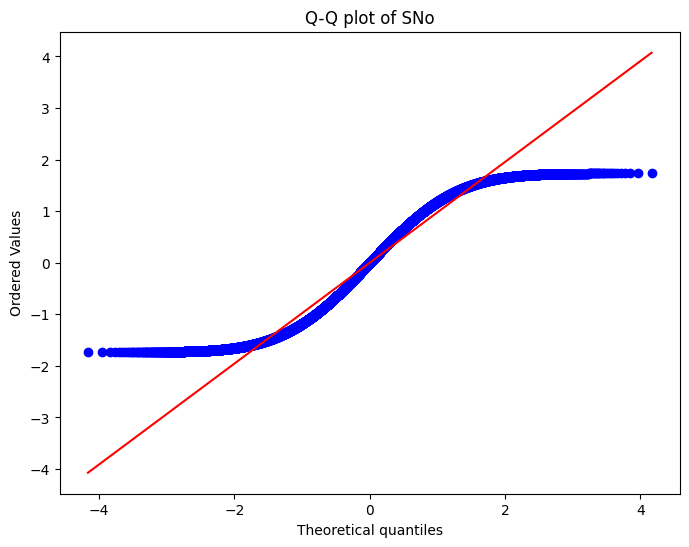

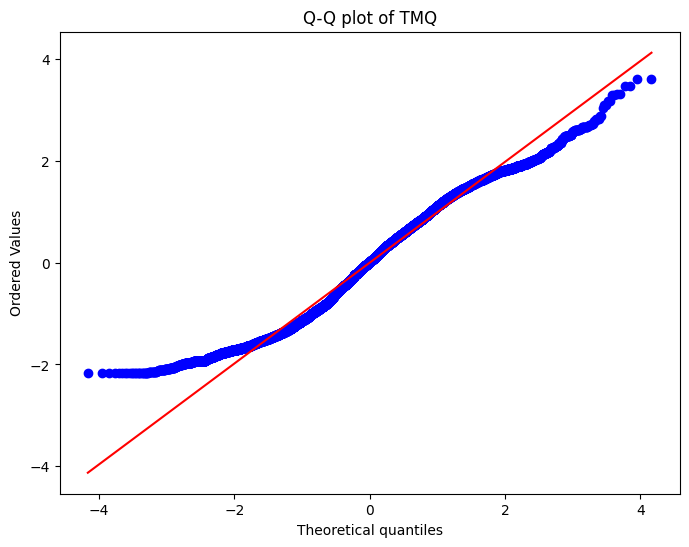

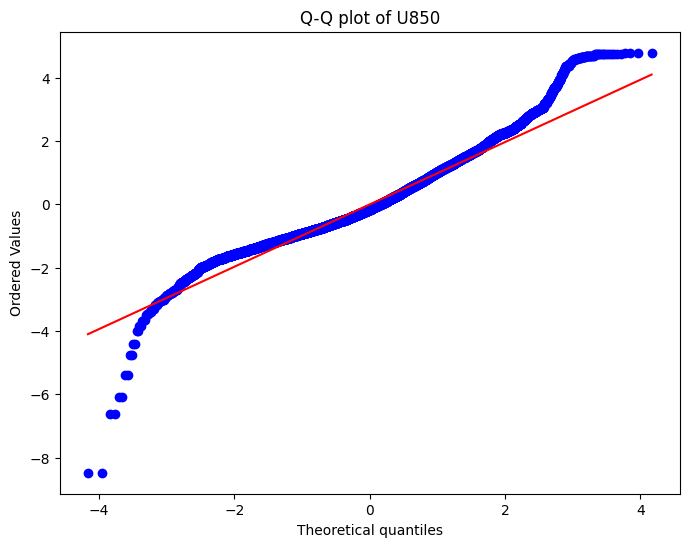

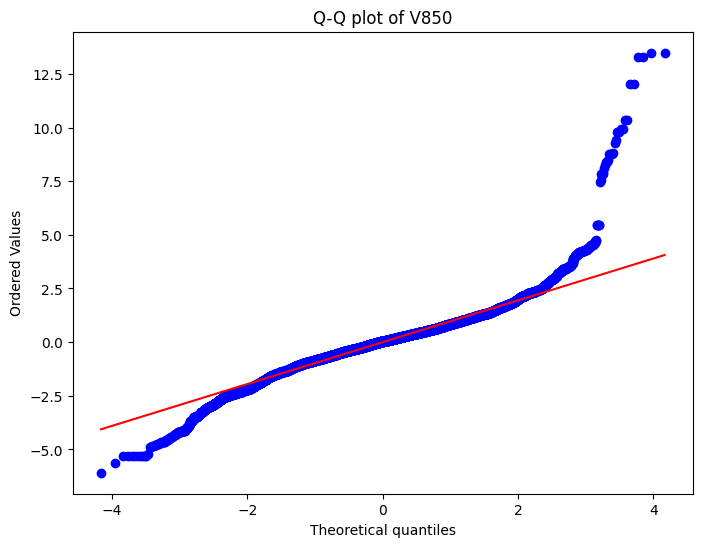

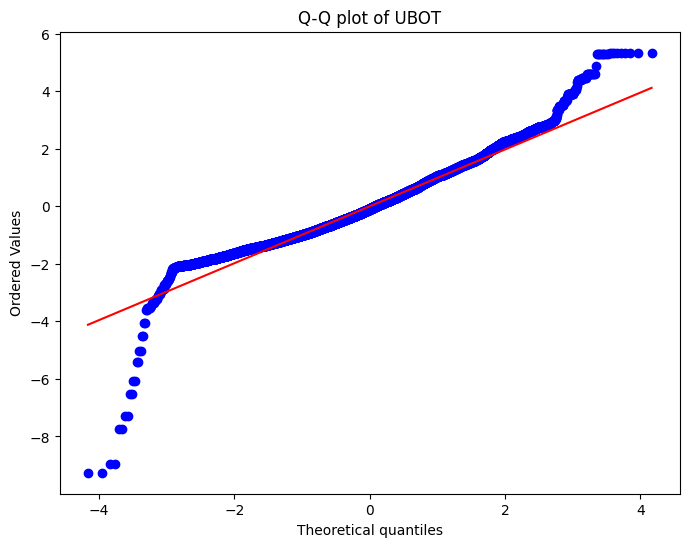

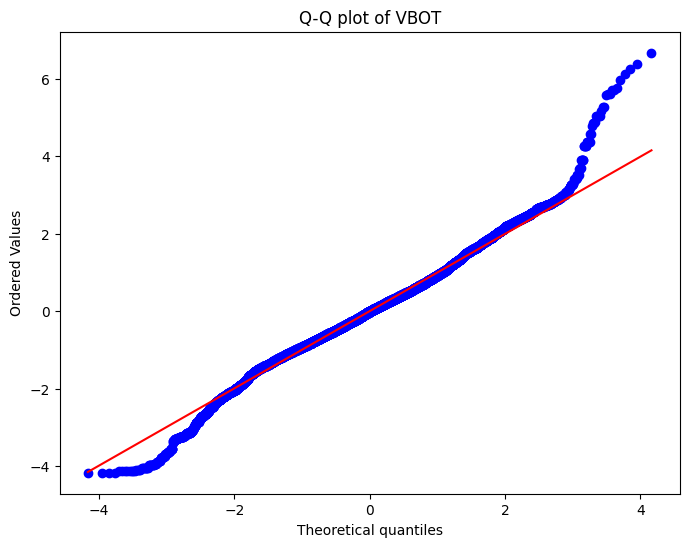

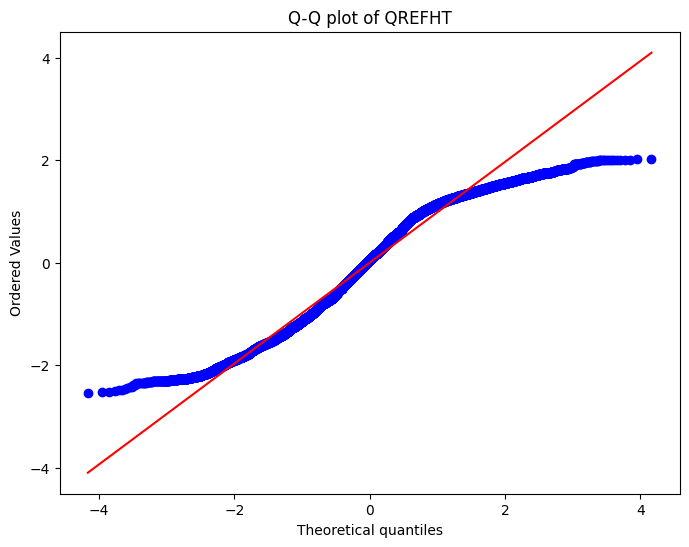

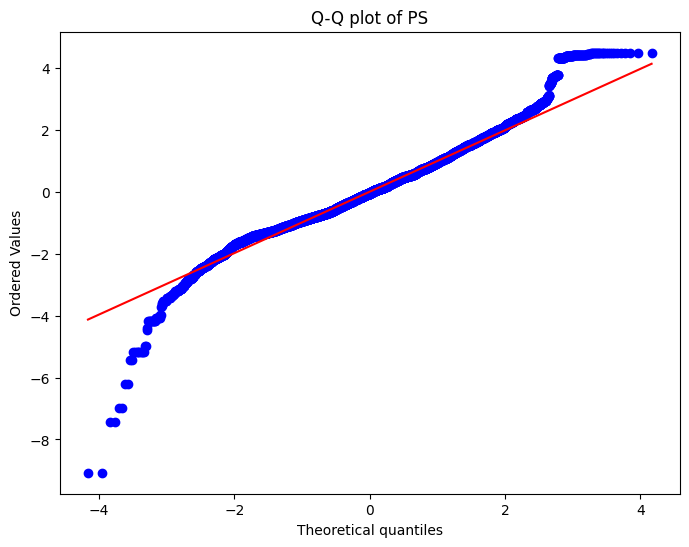

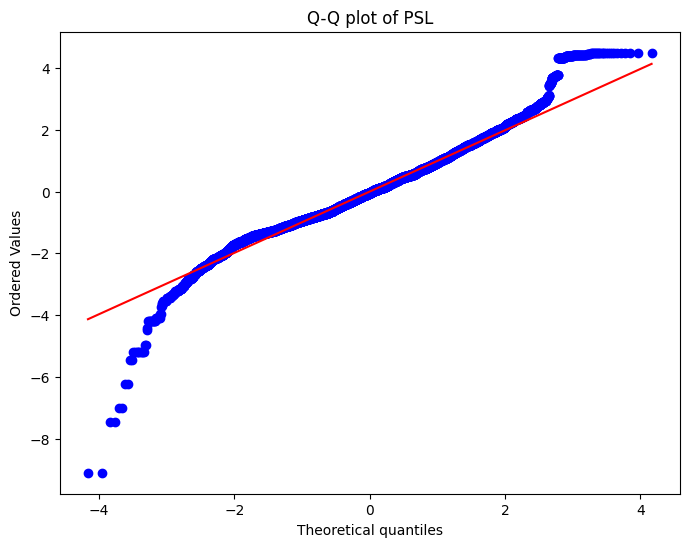

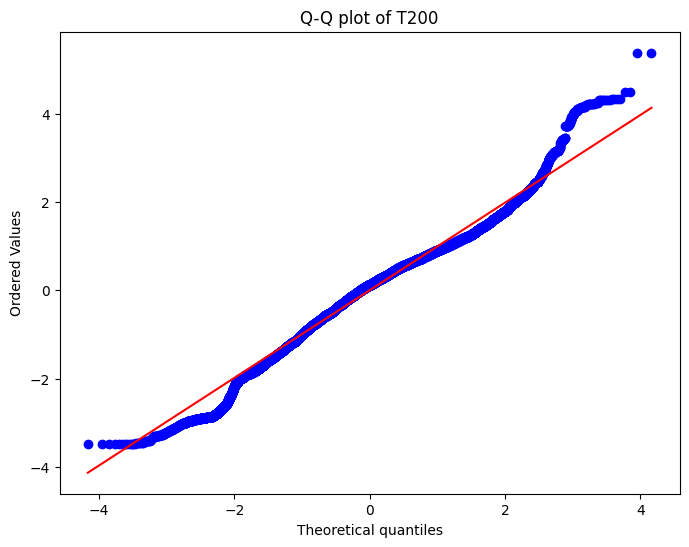

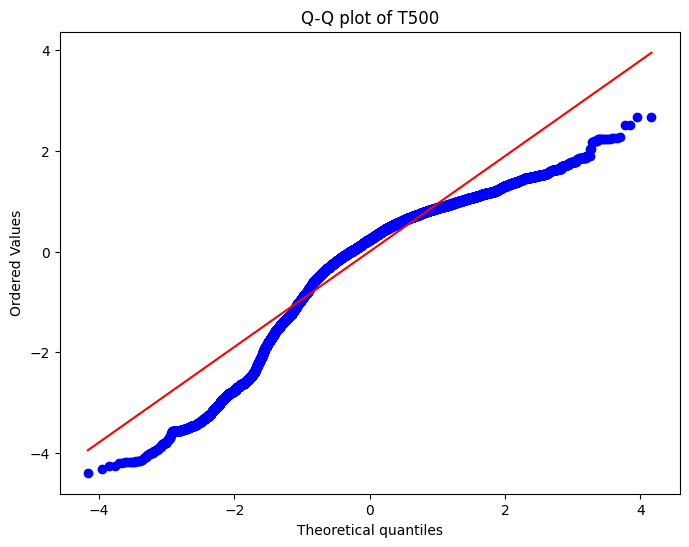

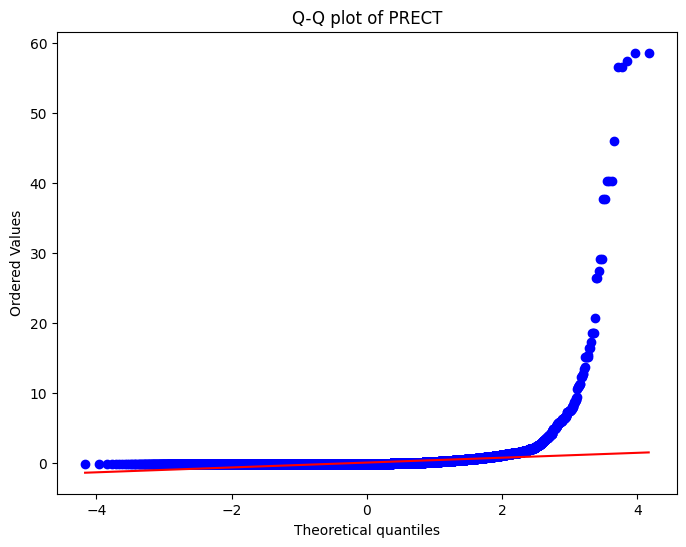

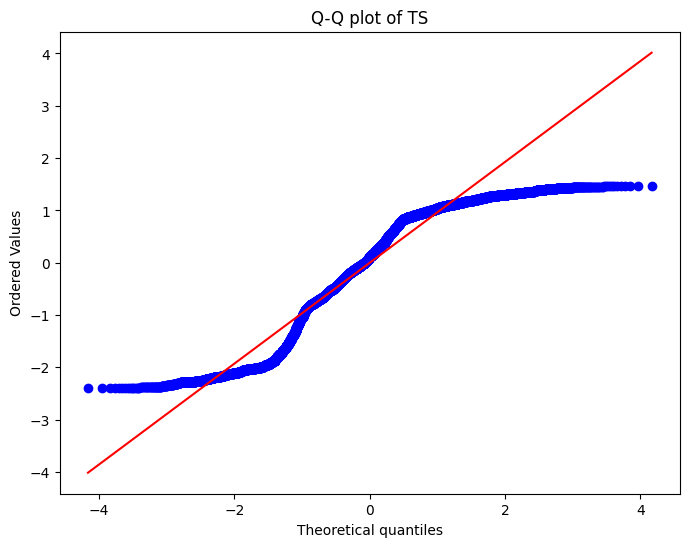

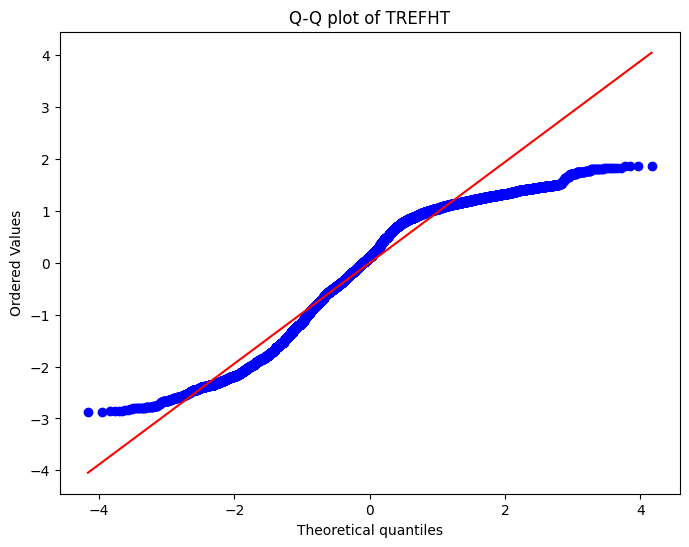

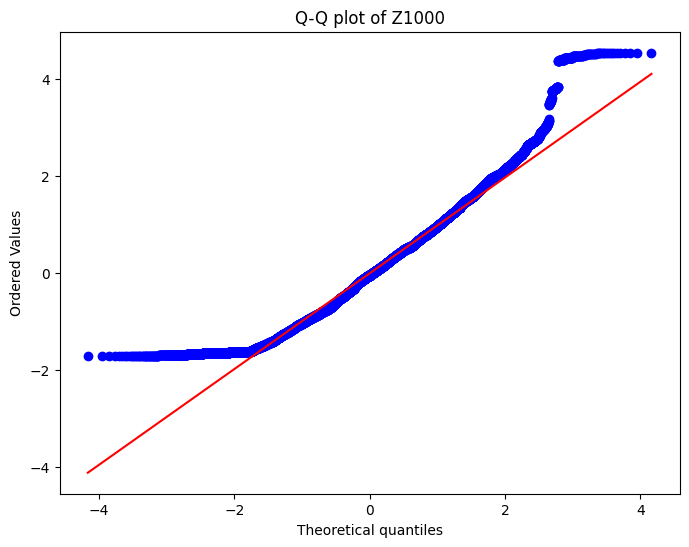

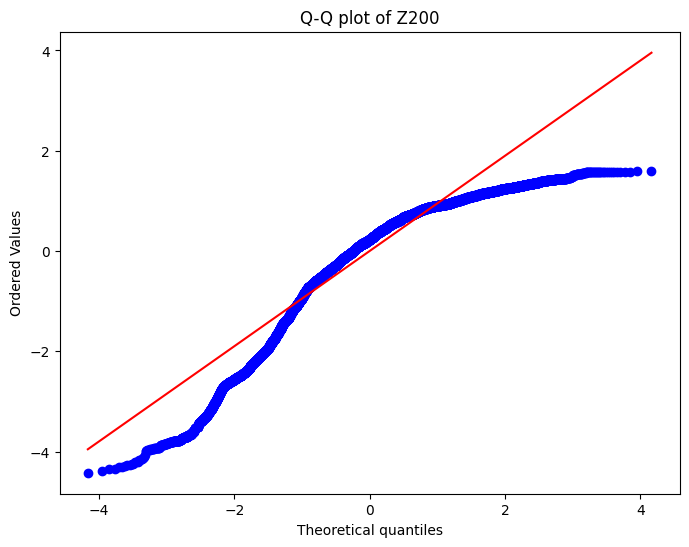

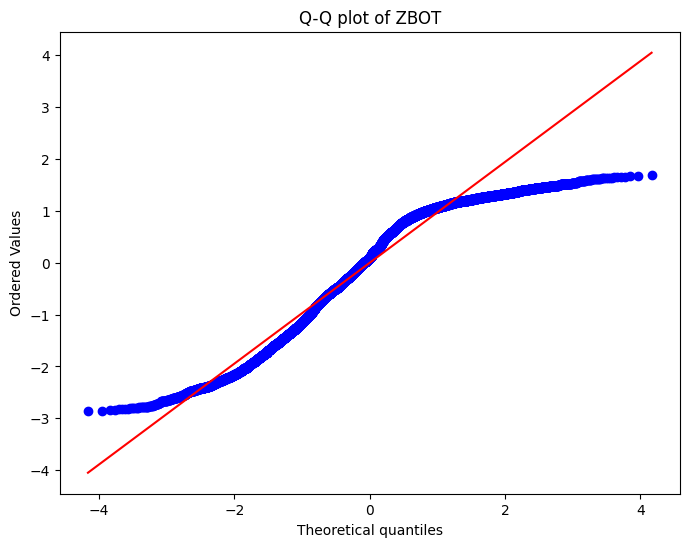

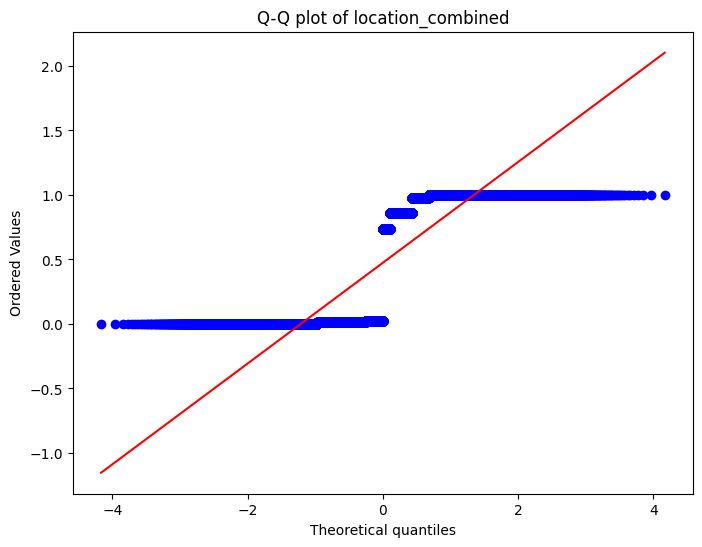

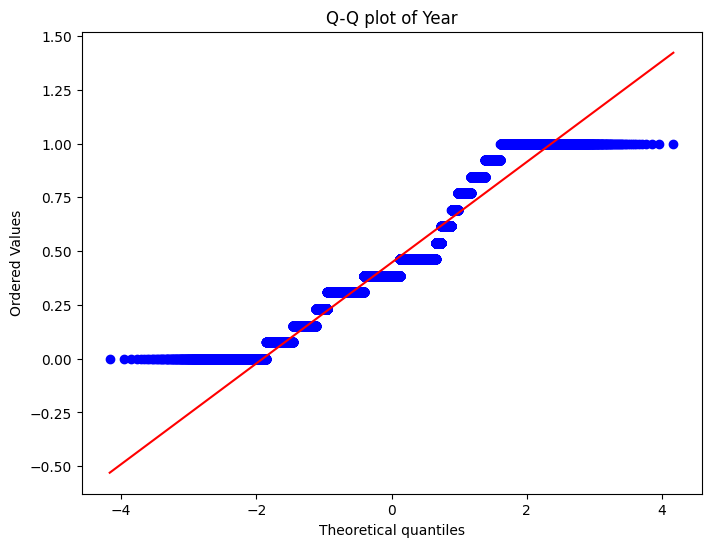

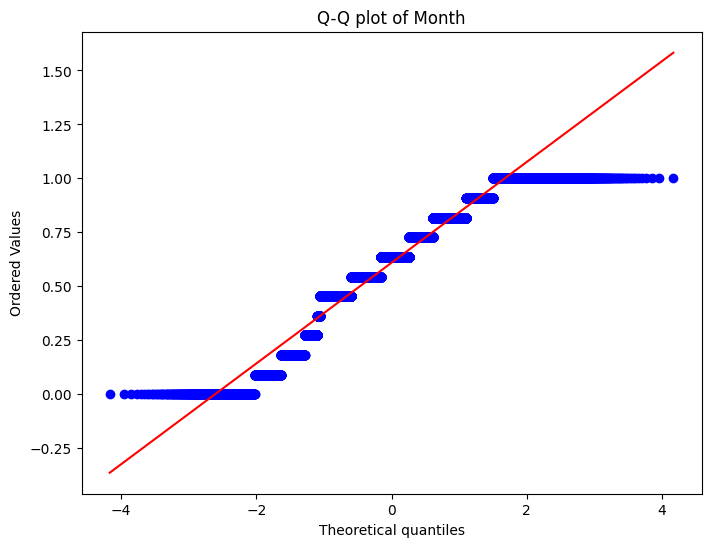

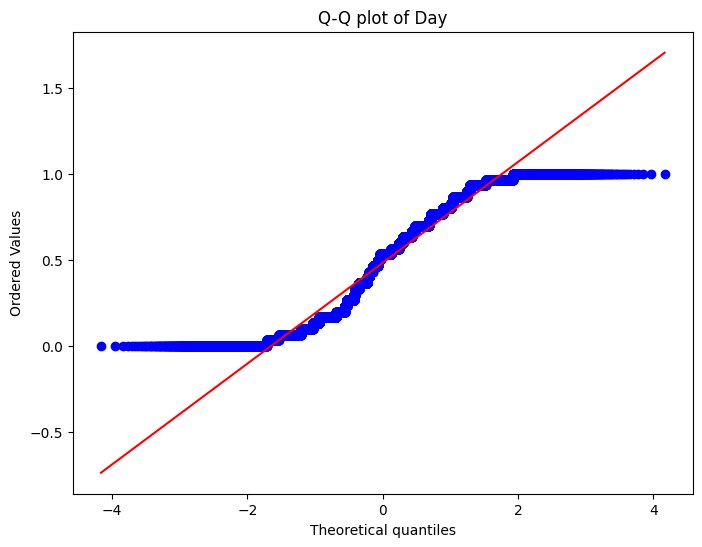

In [19]:
for feature in X_train.columns:
    plt.figure(figsize=(8, 6))
    stats.probplot(X_train[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {feature}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()


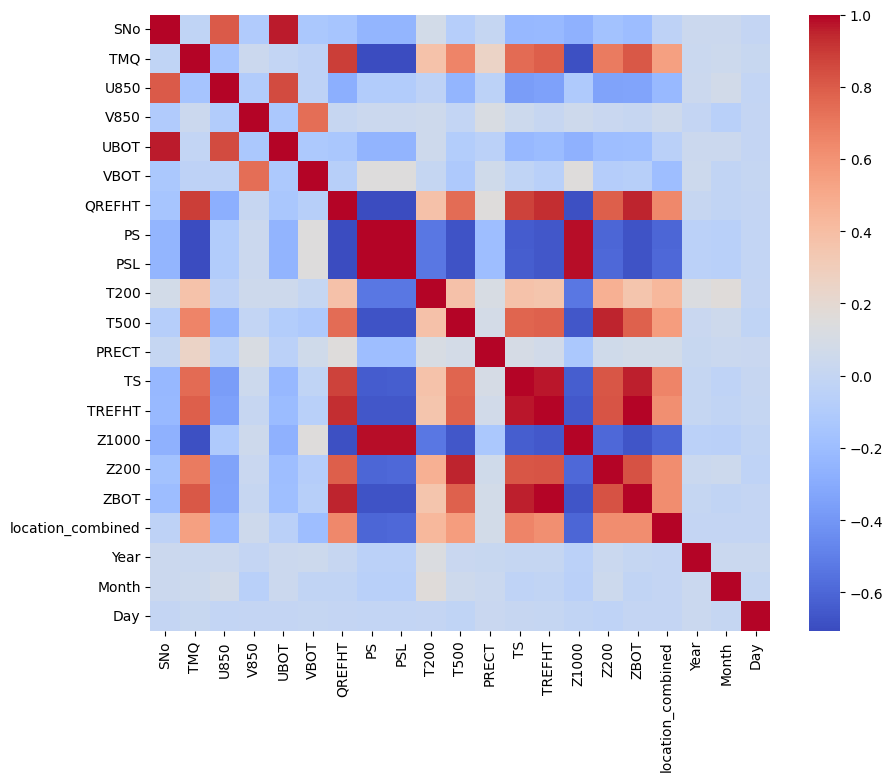

In [24]:
import seaborn as sns
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.show()

In [23]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(X_train[feature1], X_train[feature2])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:  # Adjust the significance level as needed
    print(f"{feature1} and {feature2} are dependent.")


V850 and Day are dependent.
